Devoir maison 1 Python

1. Start from scratch: import the pandas and seaborn packages, load again the movie data from the URL https://www.dropbox.com/scl/fi/cafdvvkppxult940cf1zb/MoviesRatings1.csv?rlkey=pg4xagx00xspi832fakno0jla&dl=1 <br>
into a data frame called **df_mov**

2. Create a new variable **RuntimeH** reporting the run time of a movie in hours; analyze this quantitative variable through numerical statistics and graphs. Any comments?

3. Take a look at the consistency of ratings between IMDb and Rotten Tomatoes by means of a scatterplot. Are you satisfied with the picture obtained?

4. [*Optional and difficult question*] Take yet another look at the consistency of ratings between (normalized) IMDb and Rotten Tomatoes, by considering
an additive difference between these ratings (variable **PairedDiff**) and/or a ratio of these ratings (variable **Ratio**),
and by displaying the corresponding histograms.



import the pandas and seaborn packages, load again the movie data from the URL

In [2]:
import pandas as pd
import seaborn as sns



df_mov = pd.read_csv("MoviesRatings1.csv")
df_mov.describe()

,Year,IMDb,Rotten.Tomatoes,Runtime
count,5156.000000,5156.000000,5156.000000,5120.000000
mean,2006.302948,6.375233,0.654313,100.111328
std,17.140888,1.002417,0.266147,21.654800
min,1902.000000,1.600000,0.020000,7.000000
25%,2004.000000,5.700000,0.440000,89.000000
50%,2013.000000,6.500000,0.710000,97.000000
75%,2017.000000,7.100000,0.880000,110.000000
max,2020.000000,9.000000,1.000000,270.000000


Create a new variable **RuntimeH** reporting the run time of a movie in hours; analyze this quantitative variable through numerical statistics and graphs

In [3]:
RuntimeH = df_mov['Runtime']/60





RuntimeH.describe().round(1)


count    5120.0
mean        1.7
std         0.4
min         0.1
25%         1.5
50%         1.6
75%         1.8
max         4.5
Name: Runtime, dtype: float64

In [4]:
print(type(df_mov['Runtime']))
print(type(RuntimeH))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


<Axes: xlabel='Runtime', ylabel='Count'>

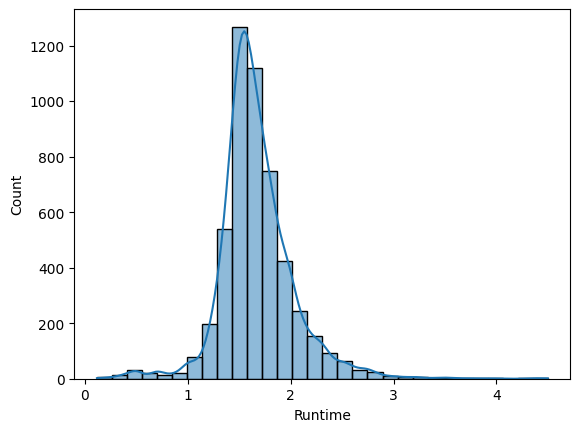

In [5]:
sns.histplot(data=RuntimeH , kde=True,bins=30) # type: ignore

<Axes: xlabel='Runtime'>

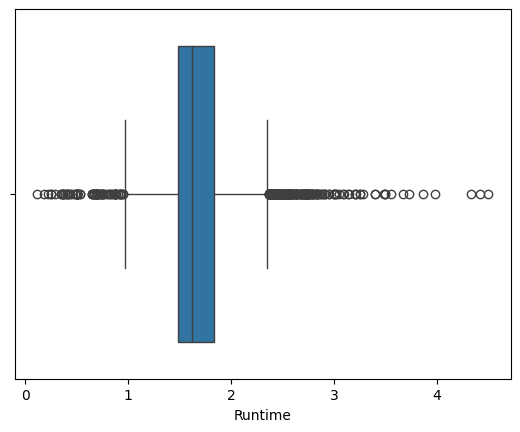

In [6]:
sns.boxplot(data=RuntimeH,native_scale=True, orient="h") # type: ignore

Take a look at the consistency of ratings between IMDb and Rotten Tomatoes by means of a scatterplot. Are you satisfied with the picture obtained?

<Axes: xlabel='IMDb', ylabel='Rotten.Tomatoes'>

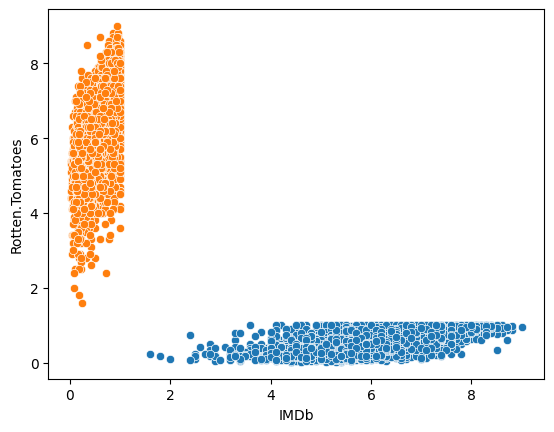

In [7]:
# print(RuntimeH)

sns.scatterplot(data=df_mov, x="IMDb", y="Rotten.Tomatoes")


sns.scatterplot(data=df_mov,  x="Rotten.Tomatoes",y="IMDb")

On y voit rien et on peut difficilement comparer le tout...

<Axes: xlabel='IMDb', ylabel='Rotten.Tomatoes'>

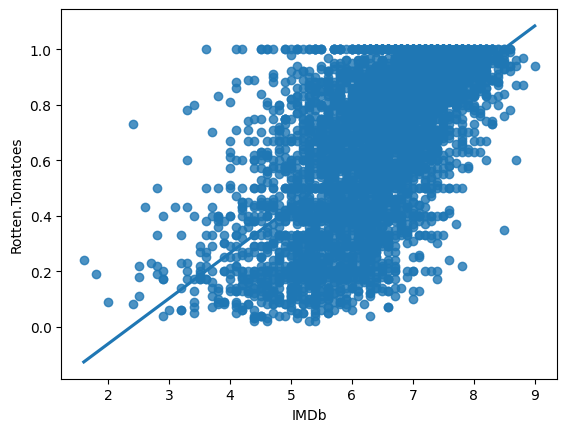

In [8]:
sns.regplot(data=df_mov, x="IMDb", y="Rotten.Tomatoes",ci=None)



Si corrélation il y a (ca pue le modèle linéaire gaussien), on a quand même un bruit sale.

4. [*Optional and difficult question*] Take yet another look at the consistency of ratings between (normalized) IMDb and Rotten Tomatoes, by considering
an additive difference between these ratings (variable **PairedDiff**) and/or a ratio of these ratings (variable **Ratio**),
and by displaying the corresponding histograms.

In [9]:

df_mov['IMDb_norm'] = df_mov['IMDb'] / 10 # Normalize IMDb rating to be on a 0-1 scale

df_mov["IMDb_centre_reduit"] = (df_mov['IMDb'] - df_mov['IMDb'].mean()) / df_mov['IMDb'].std() # Center and reduce IMDb rating
df_mov["Rotten.Tomatoes_centre_reduit"] = (df_mov['Rotten.Tomatoes'] - df_mov['Rotten.Tomatoes'].mean()) / df_mov['Rotten.Tomatoes'].std() # Center and reduce Rotten Tomatoes rating


AdditiveDifference = df_mov['Rotten.Tomatoes'] - df_mov['IMDb_norm']
RatioComparison = df_mov['Rotten.Tomatoes'] / df_mov['IMDb_norm']





<Axes: ylabel='Count'>

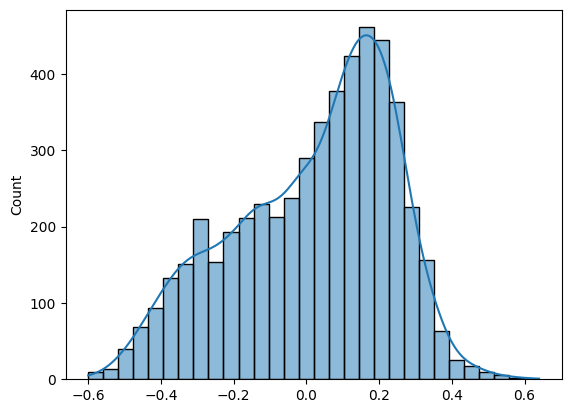

In [10]:
sns.histplot(data=AdditiveDifference , kde=True,bins=30) # type: ignore



<Axes: ylabel='Count'>

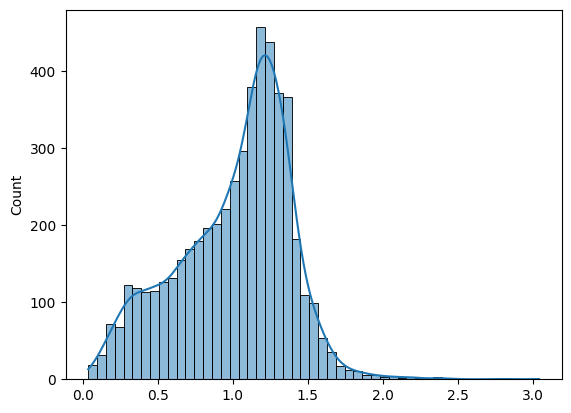

In [11]:
sns.histplot(data=RatioComparison , kde=True) # type: ignore


<Axes: ylabel='Count'>

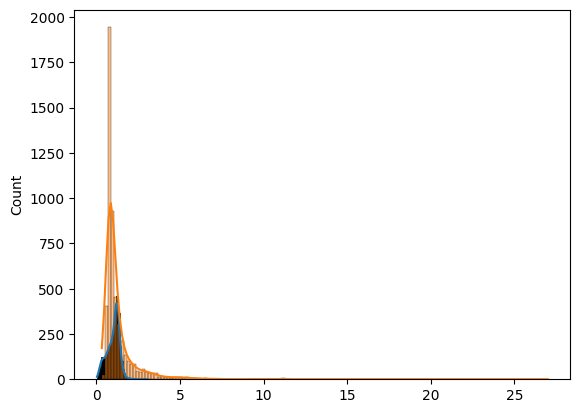

In [17]:
RatioComparison.describe().round(2)
sns.histplot(data=RatioComparison, kde=True) #type: ignore 
sns.histplot(data=1/RatioComparison, kde=True) #type: ignore 



#sns.regplot(data=df_mov, x="IMDb_norm", y="Rotten.Tomatoes",ci=None)




Part des films avec une note Rotten Tomatoes > 1.5x la note IMDb : 5.24%
Part des films avec une note IMDb > 1.5x la note Rotten Tomatoes : 19.72%


<Axes: ylabel='Count'>

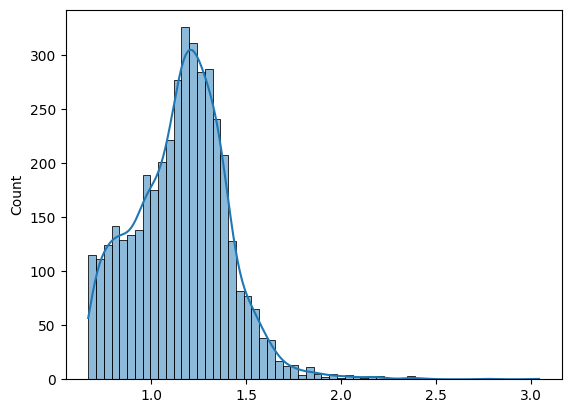

In [13]:
# Calculate the total number of movies, excluding NaN values in the ratio
total_movies = RatioComparison.count()

# Calculate the number of movies where Rotten Tomatoes rating is > 1.5 times the normalized IMDb rating
rt_outliers = RatioComparison[RatioComparison > 1.5].count()

# Calculate the number of movies where the normalized IMDb rating is > 1.5 times the Rotten Tomatoes rating
# This is equivalent to RatioComparison < 1 / 1.5
imdb_outliers = RatioComparison[RatioComparison < (1 / 1.5)].count()

# Calculate the proportions
proportion_rt_outliers = (rt_outliers / total_movies) * 100
proportion_imdb_outliers = (imdb_outliers / total_movies) * 100

print(f"Part des films avec une note Rotten Tomatoes > 1.5x la note IMDb : {proportion_rt_outliers:.2f}%")
print(f"Part des films avec une note IMDb > 1.5x la note Rotten Tomatoes : {proportion_imdb_outliers:.2f}%")



RatioComparisonFiltered = RatioComparison[(RatioComparison > 1.5) | (RatioComparison > (1 / 1.5))]
sns.histplot(data=RatioComparisonFiltered , kde=True) # type: ignore

<Axes: xlabel='IMDb', ylabel='Rotten.Tomatoes'>

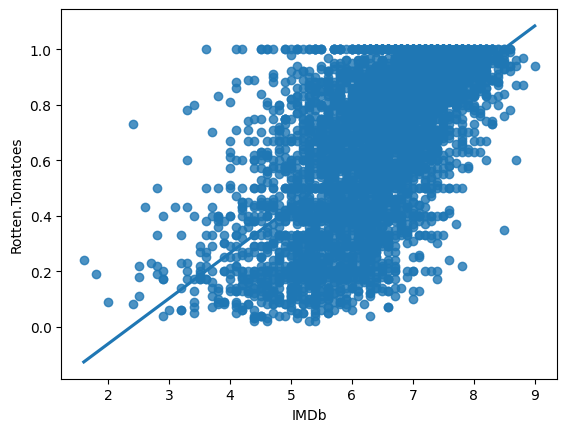

In [14]:
sns.regplot(data=df_mov, x="IMDb", y="Rotten.Tomatoes",ci=None)


<Axes: xlabel='IMDb_centre_reduit', ylabel='Rotten.Tomatoes_centre_reduit'>

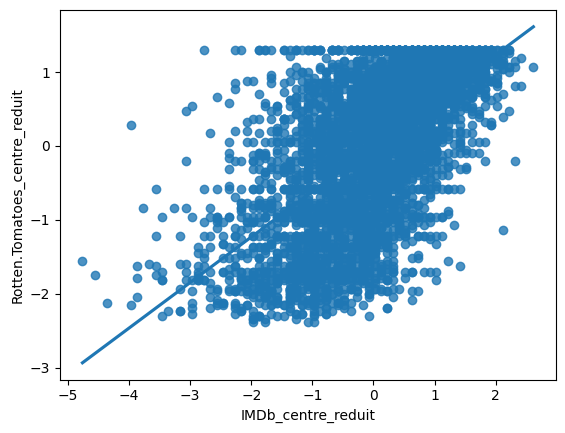

In [15]:
sns.regplot(data=df_mov, x="IMDb_centre_reduit", y="Rotten.Tomatoes_centre_reduit",ci=None)


In [16]:
import numpy as np

from sklearn import linear_model # type: ignore

reg = linear_model.LinearRegression()
reg.fit(df_mov[["IMDb_centre_reduit"]], df_mov["Rotten.Tomatoes_centre_reduit"])
print(reg.coef_)
print(reg.intercept_)


[0.61632049]
-1.005244495780979e-16
